<a href="https://colab.research.google.com/github/olawale0254/ARFIMA/blob/master/EDA_on_the_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proactively AvertingTraffic Accident in South Africa using Machine Learning 
## Synopsis
### *Introduction*: This project is all about geospatial analysis of traffic accident in South Africa
### *Main Objectives*: Troactively predict traffic accident in South Africa using machine learning
### *Significance of the study*: To contribute to the reduction of traffic accident in South Africa.
### *Data Source*: Zindi

In [33]:
# Importing The Datasets 
import pandas as pd
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")
data = pd.read_csv('/content/drive/My Drive/Data/train.csv')

In [34]:
data.head()

,EventId,Occurrence Local Date Time,Reporting Agency,Cause,Subcause,Status,longitude,latitude,road_segment_id
0,60558,01/01/16 00:53,Cam,Stationary Vehicle,Vehicle On Shoulder,Closed,18.5408955032,-33.888275,S0B3CGQ
1,60559,01/01/16 00:54,CAMERA,Accident,With A Fixed Object,Closed,18.9307563219,-34.140857,RYJYAPI
2,60560,01/01/16 02:26,Law Enforcement,Accident,Multi Vehicle,Closed,18.5533575029,-33.959154,U3KP57C
3,60561,01/01/16 02:56,CAMERA,Stationary Vehicle,Vehicle On Shoulder,Closed,18.6775561589,-33.895258,RY0TRQ8
4,60562,01/01/16 03:40,CAMERA,Accident,Multi Vehicle,Closed,18.8371319682,-34.087051,8LOVJZ3


In [35]:
data.isnull().sum()

EventId                          0
Occurrence Local Date Time       0
Reporting Agency              1619
Cause                            0
Subcause                         0
Status                           0
longitude                        0
latitude                         0
road_segment_id                  0
dtype: int64

1. Dealing with the Date 

In [36]:
data['DateTime']= data['Occurrence Local Date Time'].astype('str')
data.head(1)

,EventId,Occurrence Local Date Time,Reporting Agency,Cause,Subcause,Status,longitude,latitude,road_segment_id,DateTime
0,60558,01/01/16 00:53,Cam,Stationary Vehicle,Vehicle On Shoulder,Closed,18.5408955032,-33.888275,S0B3CGQ,01/01/16 00:53


In [37]:
data['DateTime'] = pd.to_datetime(data['DateTime'], errors='coerce')
data['year'] = data['DateTime'].dt.year
data['Day'] = data['DateTime'].dt.day_name()
data['Month'] = data['DateTime'].dt.month_name()
data['hour'] = data['DateTime'].dt.hour
data['day_of_week'] = data['DateTime'].dt.weekday
### Weekend Features 
def IsWeekend(x):
    if x in [4, 5, 6]:
        return 1
    else:
        return 0
data['IsWeekend'] = data['day_of_week'].apply(IsWeekend)    

### Payday
def PayDay(x):
    if x >= 25 and x<=31:
        return 1
    else:
        return 0
data['PayDay'] = data['day_of_week'].apply(PayDay)    

data.head(1)

,EventId,Occurrence Local Date Time,Reporting Agency,Cause,Subcause,Status,longitude,latitude,road_segment_id,DateTime,year,Day,Month,hour,day_of_week,IsWeekend,PayDay
0,60558,01/01/16 00:53,Cam,Stationary Vehicle,Vehicle On Shoulder,Closed,18.5408955032,-33.888275,S0B3CGQ,2016-01-01 00:53:00,2016,Friday,January,0,4,1,0


In [38]:
data = data.drop('Occurrence Local Date Time', axis=1) 
data.head(2)

,EventId,Reporting Agency,Cause,Subcause,Status,longitude,latitude,road_segment_id,DateTime,year,Day,Month,hour,day_of_week,IsWeekend,PayDay
0,60558,Cam,Stationary Vehicle,Vehicle On Shoulder,Closed,18.5408955032,-33.888275,S0B3CGQ,2016-01-01 00:53:00,2016,Friday,January,0,4,1,0
1,60559,CAMERA,Accident,With A Fixed Object,Closed,18.9307563219,-34.140857,RYJYAPI,2016-01-01 00:54:00,2016,Friday,January,0,4,1,0


## Accidents Based on Time



1. Month

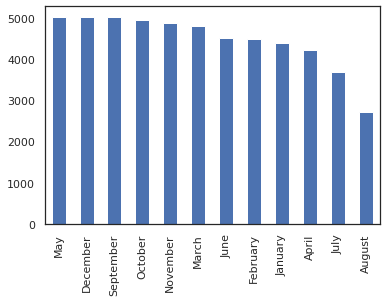

In [39]:
data['Month'].value_counts().plot.bar()

2. Day

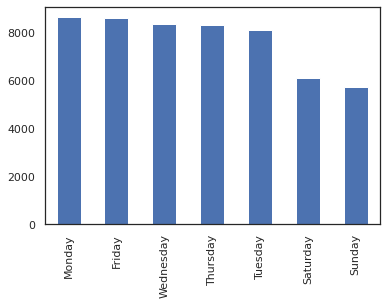

In [40]:
data['Day'].value_counts().plot.bar()

3. Year

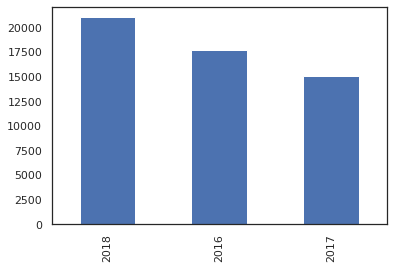

In [41]:
data['year'].value_counts().plot.bar()

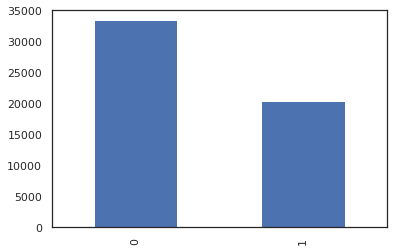

In [42]:
data['IsWeekend'].value_counts().plot.bar()

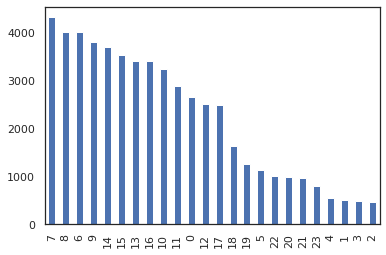

In [43]:
data['hour'].value_counts().plot.bar()

Our findings are listed below
- Traffic Accidents happen majorly by May, December and September
- Mondays and Fridays has the highest number of recorded accidents 
- 2018 hasthe highest recorded cases of accidents while 2017 has the least
- Most accidents happend around the 7th, 8th, 6th and 9th  hour of the day i.e 7:00am, 8:00am, 6:00am and 9:00am in the morning. Looking closely, we notices that 13:00hours to 16:00hours i.e between 1:00pm and 4:00pm are the next group that follows the highly recorded time for accidents. 

## Major cause of Accident

In [44]:
data['Cause'].unique()

array(['Stationary Vehicle', 'Accident', 'Police and Military',
       'Congestion', 'Fire', 'Routine Road Maintenance', 'Pedestrians',
       'Obstruction', 'Lost Load', 'Field Device Maintenance', 'HAZMAT',
       'Poor Visibility', 'Road Construction', 'Weather Conditions',
       'Sporting Events', 'Cam', 'cdam', 'cam', 'Crash', 'Concerts/Other',
       'Arrestor', 'Roadworks', 'Fire & Smoke',
       'Weather & Road Conditions'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


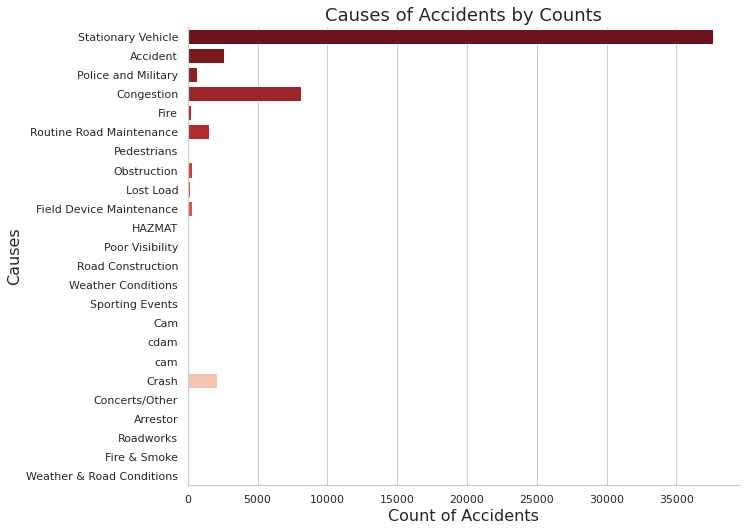

In [45]:
sns.set_style("whitegrid")
g = sns.factorplot(y="Cause", data=data, kind="count",
                   palette="Reds_r", size=7, aspect=1.5)
g.ax.set_title("Causes of Accidents by Counts",fontdict={'size':18})
g.ax.xaxis.set_label_text("Count of Accidents",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Causes",fontdict= {'size':16})
plt.show()

The major cause of the acident is Stationary Vehicles, Congestions and Routine road mentainance.
We infestigated the major causes of the accidents and theyare explained below.

## Date Related Insights 

In [46]:
import seaborn as sns
import matplotlib.pylab as plt
### Number  of years 
data['year'].unique()

array([2016, 2017, 2018])

In [47]:
#Calculating the number of weeks in the dataset we have data for
b = data[data["year"]==2018]["DateTime"].dt.week.nunique() + data[data["year"]==2017]["DateTime"].dt.week.nunique() + data[data["year"]==2016]["DateTime"].dt.week.nunique()

### Days with Highest Number of Accident based on Cause of Accident

1. Stationary Vehicles 

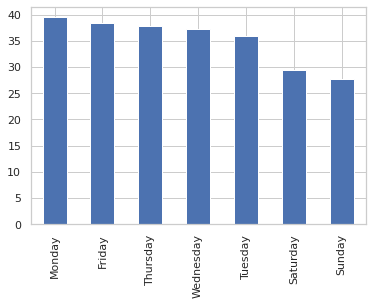

In [48]:
(data[data['Cause']=='Stationary Vehicle']["Day"].value_counts()/b).plot.bar()

2. Congestion

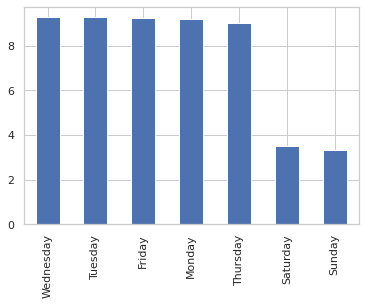

In [49]:
(data[data['Cause']=='Congestion']["Day"].value_counts()/b).plot.bar()

3. Accident

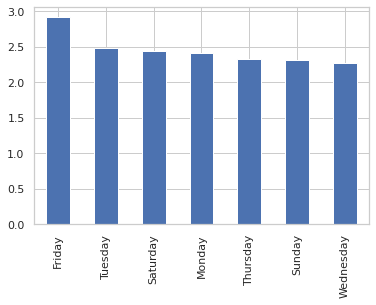

In [50]:
(data[data['Cause']=='Accident']["Day"].value_counts()/b).plot.bar()

4. Routine Road Maintenance

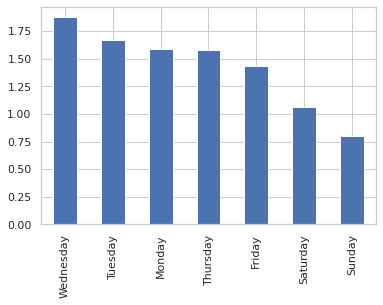

In [51]:
(data[data['Cause']=='Routine Road Maintenance']["Day"].value_counts()/b).plot.bar()

5. Crash

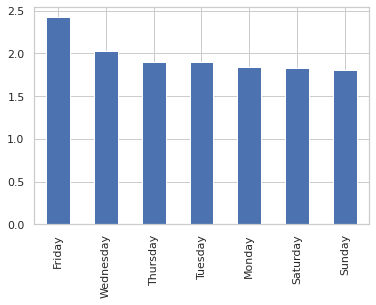

In [52]:
(data[data['Cause']=='Crash']["Day"].value_counts()/b).plot.bar()

Based on our findings from above, the traffic accidents happend on different days of the week. 
- Most Traffic accidents caused by Stationary Vehiceles happens on **Mondays**
- Most Traffic accidents caused by Congestions often happen on **Wednesdays Tuesdays and Fridays**
- Most Traffic accidents caused by Unknown accidents happens on **Fridays**
- Most Traffic accidents caused by Routine Road Maintenance happen on **Wednesdays**
- Most Traffic accidents caused by Routine Road Crash happen on **Friday**




## Geospatial Features 

In [60]:
# data = data.drop(data.index[[16693]])
# data = data.drop(data.index[[23454]])
data = data[data.longitude != 'Closed']
data["longitude"] = pd.to_numeric(data["longitude"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

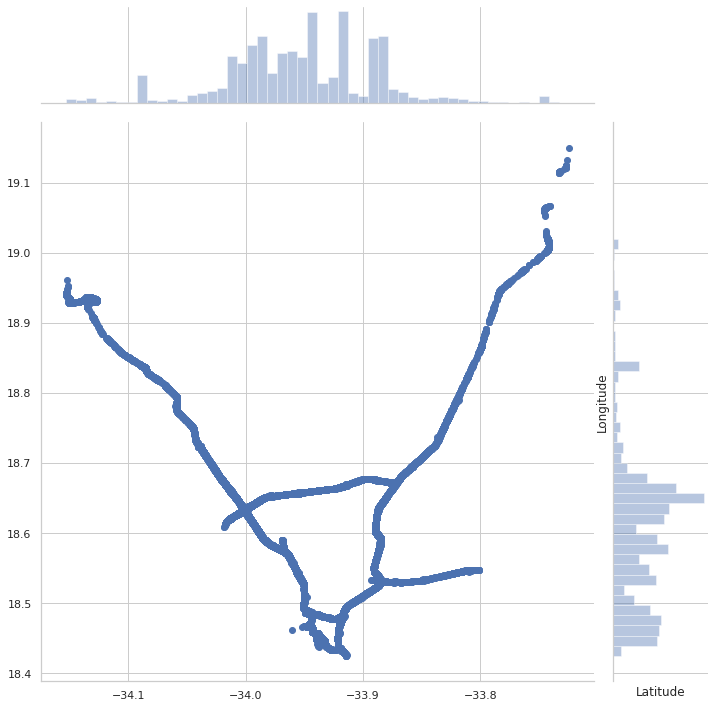

In [61]:
plt.figure(figsize=(12,12))
sns.jointplot(x=data.latitude.values, y=data.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()